<a href="https://colab.research.google.com/github/yugratna19/TrekNepal/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dependencies
!pip install -q kaggle

In [2]:
# Download the dataset
!kaggle datasets download -d bibekrai44/nepal-treking-dataset

# Unzip the dataset
!unzip nepal-treking-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/bibekrai44/nepal-treking-dataset
License(s): unknown
  0% 0.00/5.16k [00:00<?, ?B/s]
100% 5.16k/5.16k [00:00<00:00, 2.59MB/s]
Archive:  nepal-treking-dataset.zip
  inflating: Trek Data.csv           


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import joblib

In [4]:
df = pd.read_csv('/content/Trek Data.csv')

## **Data preprocessing**

In [5]:
df.head()

,Unnamed: 0,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Contact or Book your Trip
0,0,Everest Base Camp Trek,"\n$1,420 USD",16 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com
1,1,Everest Base Camp Short Trek,"\n$1,295 USD",14 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com
2,2,Everest Base Camp Heli Shuttle Trek,\n$2000 USD,12 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com
3,3,Everest Base Camp Heli Trek,"\n$3,300 USD",11 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com
4,4,Everest Base Camp Trek for Seniors,"\n$1,800 USD",20 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com


In [6]:
df.describe()

,Unnamed: 0
count,383.00000
mean,191.00000
std,110.70682
min,0.00000
25%,95.50000
50%,191.00000
75%,286.50000
max,382.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 383 non-null    int64 
 1   Trek                       383 non-null    object
 2   Cost                       383 non-null    object
 3   Time                       383 non-null    object
 4   Trip Grade                 383 non-null    object
 5   Max Altitude               383 non-null    object
 6   Accomodation               383 non-null    object
 7   Best Travel Time           383 non-null    object
 8   Contact or Book your Trip  383 non-null    object
dtypes: int64(1), object(8)
memory usage: 27.1+ KB


In [8]:
df.isnull().sum()

Unnamed: 0                   0
Trek                         0
Cost                         0
Time                         0
Trip Grade                   0
Max Altitude                 0
Accomodation                 0
Best Travel Time             0
Contact or Book your Trip    0
dtype: int64

In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.head()

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Contact or Book your Trip
0,Everest Base Camp Trek,"\n$1,420 USD",16 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com
1,Everest Base Camp Short Trek,"\n$1,295 USD",14 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com
2,Everest Base Camp Heli Shuttle Trek,\n$2000 USD,12 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com
3,Everest Base Camp Heli Trek,"\n$3,300 USD",11 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com
4,Everest Base Camp Trek for Seniors,"\n$1,800 USD",20 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com


In [11]:
# Convert 'Cost'column string to float
def convert_cost(cost_str):
  cost_str =  cost_str.lower().replace('$','').replace('usd','')
  cost_str =  cost_str.replace(',','')
  return float(cost_str)

# Convert 'Max'
def convert_max_altitude(altitude_str):
  altitude_str =  altitude_str.lower().replace('m', '')
  try:
    altitude_str =  altitude_str.lower().replace(',', '')
  except:
    altitude_str = altitude_str
  return int(altitude_str)

def convert_days(day_str):
  day_str =  day_str.lower().replace('days', '')
  return int(day_str)

In [12]:
df['Cost'].head()

0    \n$1,420     USD
1    \n$1,295     USD
2         \n$2000 USD
3    \n$3,300     USD
4    \n$1,800     USD
Name: Cost, dtype: object

In [13]:
df['Max Altitude'].unique()

array(['5545 m', '5360 m', '3900 m', '3860 m', '4210 m', '4230 m',
       '4200 m', '4,200 m', '5416 m', '2012m', '3210 m', '1990 m',
       '5106 m', '5220 m', '5050 m', '4600m', '2607 m', '3650 m',
       '4,130m', '5,545m', '5,416m', '3,870m', '6,340m', '5,357m',
       '3,540m', '5,160m', '5,000m', '3,055m', '5,546m', '5,143m',
       '6,000m', '1,730m', '4,870m', '5,320m', '4,460m', '4,500m',
       '3,210m', '5,122m', '1,550m', '3,860m', '4200m', '4,773m',
       '5,220m'], dtype=object)

In [14]:
df['Time'].unique()

array([' 16 Days', ' 14 Days', ' 12 Days', ' 11 Days', ' 20 Days',
       ' 19 Days', ' 22 Days', ' 7 Days', ' 10 Days', ' 9 Days',
       ' 21 Days', ' 8 Days', ' 18 Days', ' 17 Days', ' 5 Days',
       ' 15 Days', ' 18 days', ' 25 Days', ' 27 Days', ' 13 Days',
       '16 Days', '15 Days', '10 Days', '19 Days', '13 Days', '9 Days',
       '17 Days', '11 Days'], dtype=object)

In [15]:
df['Cost'] = df['Cost'].apply(convert_cost)

In [16]:
df['Max Altitude'] = df['Max Altitude'].apply(convert_max_altitude)

In [17]:
df['Time'] = df['Time'].apply(convert_days)

In [18]:
df.head()

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Contact or Book your Trip
0,Everest Base Camp Trek,1420.0,16,Moderate,5545,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com
1,Everest Base Camp Short Trek,1295.0,14,Moderate,5545,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com
2,Everest Base Camp Heli Shuttle Trek,2000.0,12,Moderate,5545,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com
3,Everest Base Camp Heli Trek,3300.0,11,Moderate,5545,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com
4,Everest Base Camp Trek for Seniors,1800.0,20,Moderate,5545,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trek                       383 non-null    object 
 1   Cost                       383 non-null    float64
 2   Time                       383 non-null    int64  
 3   Trip Grade                 383 non-null    object 
 4   Max Altitude               383 non-null    int64  
 5   Accomodation               383 non-null    object 
 6   Best Travel Time           383 non-null    object 
 7   Contact or Book your Trip  383 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 24.1+ KB


## **Data visualization**

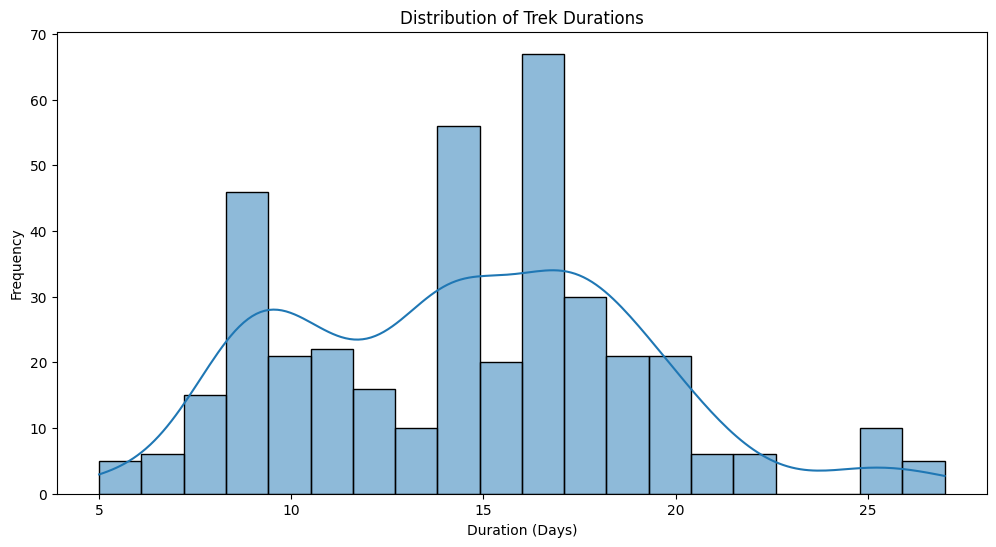

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of trek durations
plt.figure(figsize=(12, 6))
sns.histplot(df['Time'], bins=20, kde=True)
plt.title('Distribution of Trek Durations')
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')
plt.show()

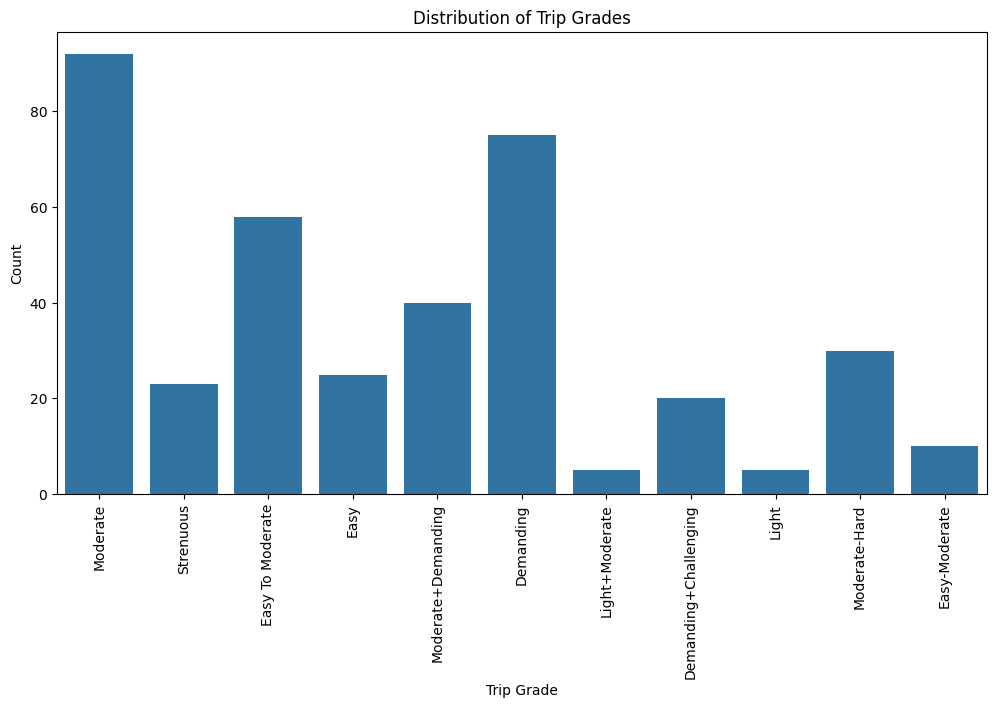

In [21]:
# Plot the distribution of trip grades
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Trip Grade')
plt.title('Distribution of Trip Grades')
plt.xlabel('Trip Grade')
plt.xticks(rotation =  90)
plt.ylabel('Count')
plt.show()

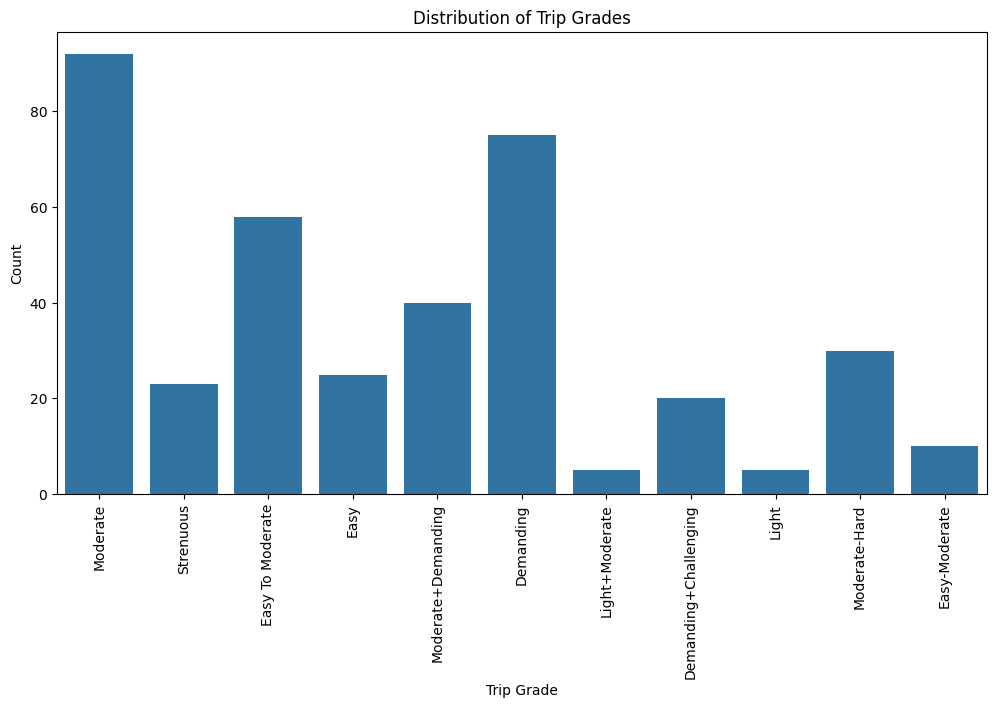

In [22]:
# Plot the distribution of trip grades
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Trip Grade')
plt.title('Distribution of Trip Grades')
plt.xlabel('Trip Grade')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

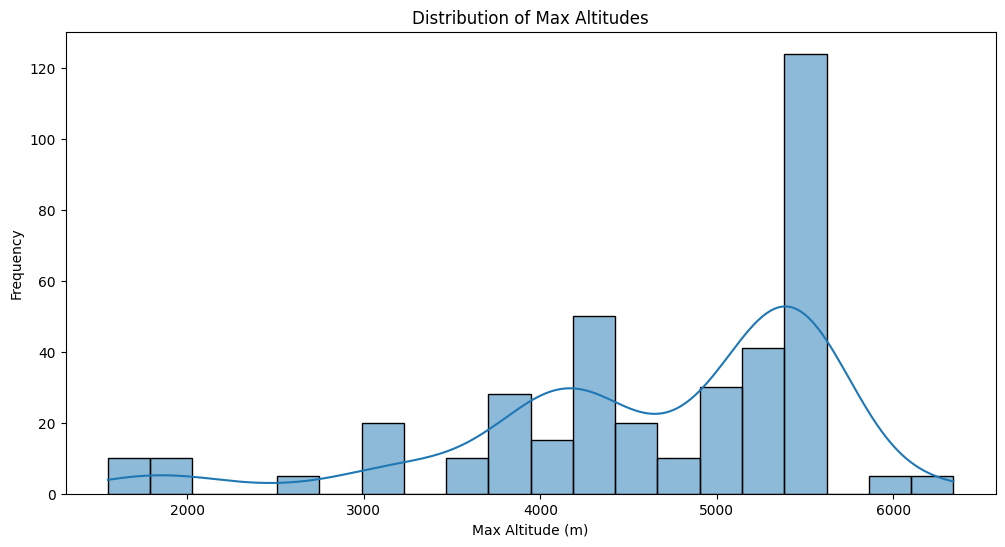

In [23]:
# Plot the distribution of max altitudes
plt.figure(figsize=(12, 6))
sns.histplot(df['Max Altitude'], bins=20, kde=True)
plt.title('Distribution of Max Altitudes')
plt.xlabel('Max Altitude (m)')
plt.ylabel('Frequency')
plt.show()

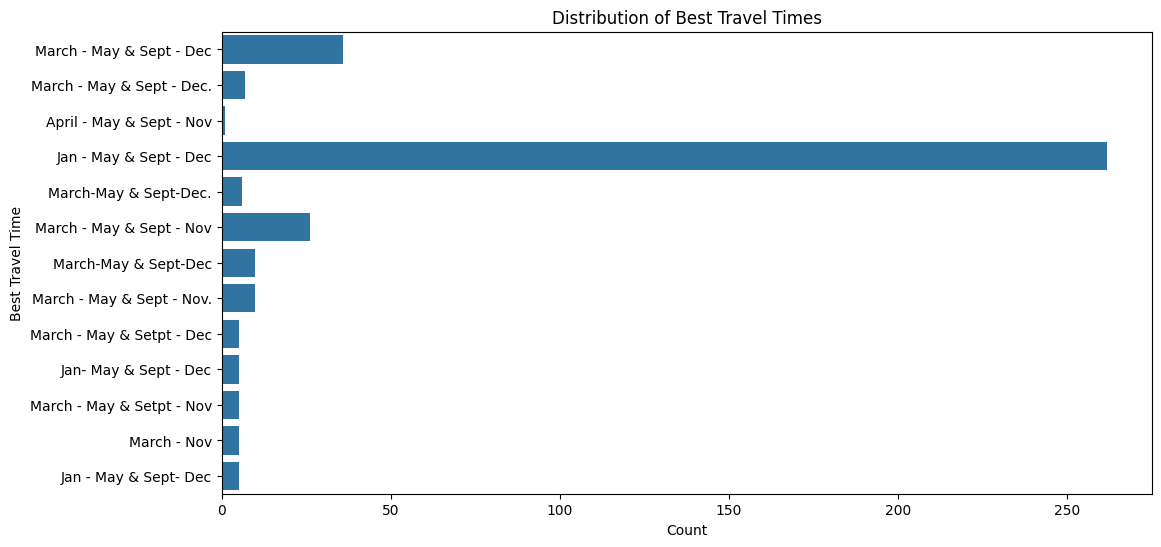

In [24]:
# Plot the distribution of best tavel
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Best Travel Time')
plt.title('Distribution of Best Travel Times')
plt.xlabel('Count')
plt.ylabel('Best Travel Time')
plt.show()

## **Feature Engineering**

In [25]:
# Create Categories
df['Cost Range'] = pd.cut(df['Cost'], bins=[0, 1000, 2000, 3000, 4000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High', 'Luxury'])

df['Duration Category'] = pd.cut(df['Time'], bins=[0, 7, 14, 21, float('inf')], labels=['Short', 'Medium', 'Long', 'Very Long'])

df['Altitude Category'] = pd.cut(df['Max Altitude'], bins=[0, 3000, 4000, 5000, 6000, float('inf')], labels=['Low', 'Moderate', 'High', 'Very High', 'Extreme'])

In [26]:
df.head()

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Contact or Book your Trip,Cost Range,Duration Category,Altitude Category
0,Everest Base Camp Trek,1420.0,16,Moderate,5545,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com,Medium,Long,Very High
1,Everest Base Camp Short Trek,1295.0,14,Moderate,5545,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com,Medium,Medium,Very High
2,Everest Base Camp Heli Shuttle Trek,2000.0,12,Moderate,5545,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com,Medium,Medium,Very High
3,Everest Base Camp Heli Trek,3300.0,11,Moderate,5545,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com,Very High,Medium,Very High
4,Everest Base Camp Trek for Seniors,1800.0,20,Moderate,5545,Hotel/Guesthouse,March - May & Sept - Dec,https://www.nepalhikingteam.com,Medium,Long,Very High


In [27]:
label_encoders = {}
for column in ['Trek', 'Trip Grade', 'Accomodation', 'Best Travel Time', 'Cost Range', 'Duration Category', 'Altitude Category']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [28]:
feature_columns = ['Time', 'Cost', 'Trip Grade', 'Max Altitude', 'Accomodation', 'Best Travel Time', 'Cost Range', 'Duration Category', 'Altitude Category']

In [29]:
X = df[feature_columns]
y = df['Trek']

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
rf_model =  RandomForestClassifier(random_state=42)

In [33]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [34]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [35]:
best_rf_model = grid_search.best_estimator_

In [36]:
y_pred = best_rf_model.predict(X_test)
y_pred

array([40, 74,  9, 67, 71, 32, 45, 28, 39,  0, 10, 78, 59, 21, 41, 54, 39,
       70, 63, 65, 19, 21, 34, 15, 42, 72, 62, 60, 22, 25, 68, 65, 74, 39,
       44, 77, 45, 40, 49, 48, 37, 21, 19, 57,  7,  9, 75, 25,  0, 52, 77,
       12, 24, 11, 31, 33, 73, 70, 25, 74, 16, 54, 34, 28, 76, 25, 52, 11,
       76, 18, 58, 47, 77, 15, 44, 48, 57])

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.987012987012987


In [38]:
joblib.dump(best_rf_model, 'improved_trek_recommendation_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']